In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

import os
import numpy as np
import matplotlib.pyplot as plt
import torch
from torch.utils.data import DataLoader
from tqdm import tqdm

from experanto.data import Mouse2pChunkedDataset, Mouse2pStaticImageDataset

In [2]:
root_folder = "../data/dynamic29228-2-10-Video-sensorium23_sanitycheck_times_fixed/"
sampling_rate = 8  # Hz
chunk_size = 16 # samples per block, i.e. context length in samples per neuron
dataset = Mouse2pChunkedDataset(root_folder=root_folder, chunk_size=chunk_size, sampling_rate=sampling_rate)

In [3]:
datapoint = dataset[0]

In [4]:
for k, v in datapoint.items():
    print(k, v.shape)

responses (16, 7928)
treadmill (16, 1)
eye_tracker (16, 3)
screen (16, 1, 36, 64)
timestamps (16, 7928)


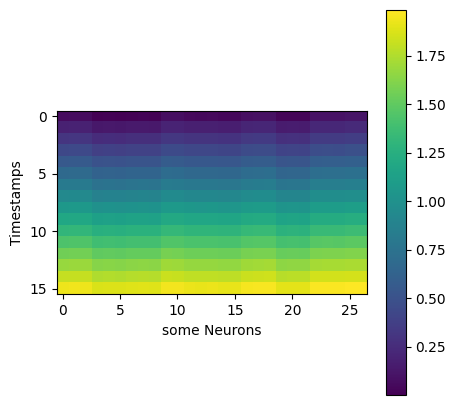

In [17]:
fig, axs = plt.subplots(1,1, figsize=(5,5))
plt.imshow(datapoint["timestamps"][:,np.arange(0,8000,300)])
plt.xlabel("some Neurons")
plt.ylabel("Timestamps")
plt.colorbar()

# Get Dataloader

In [40]:
# The interpolation of the data isn't terribly fast, so I'd recommend to set num workers to >= 4
dataloader = DataLoader(dataset, 
                        batch_size=32, 
                        shuffle=True, 
                        num_workers=16, 
                        persistent_workers=True,
                        prefetch_factor=4)

In [43]:
for b in tqdm(dataloader):
    gpu_tensor = b["screen"].cuda()

100% 114/114 [00:02<00:00, 48.71it/s]


In [46]:
gpu_tensor.shape

torch.Size([30, 16, 1, 36, 64])

#### dataloader speed comparison with num_workers=0

In [44]:
# The interpolation of the data isn't terribly fast, so I'd recommend to set num workers to >= 4
slow_dataloader = DataLoader(dataset, 
                               batch_size=32, 
                               shuffle=True, 
                               num_workers=0, 
                       )

In [45]:
for b in tqdm(slow_dataloader):
    gpu_tensor = b["screen"].cuda()

100% 114/114 [00:13<00:00,  8.43it/s]
